In [295]:
from compare_simulators import CalculatorComparator
from population_simulator import CerfaPopulationSimulator
import matplotlib.pyplot as plt
%matplotlib inline


In [296]:
# Creating the comparator and loading existing results

comp = CalculatorComparator()
comp.load_results_from_json('1aj-100')

salaire = comp.get_variable_from_testcases('1AJ')
revdisp = comp.get_variable_from_openfisca('revdisp') 
impot_openfisca = comp.get_variable_from_openfisca('irpp') 
impot_m = comp.get_variable_from_m('IRN')
impot_online = comp.get_variable_from_online('IINET')




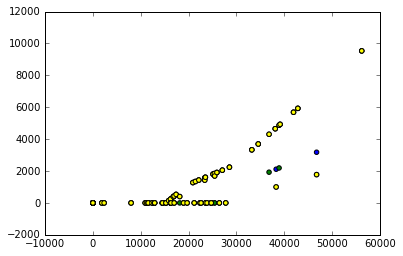

In [297]:
# Plotting results from calculators for the impot sur le revenu

# x = salary
# y_yellow = impot_online (official site)
# y_green = impot_m
# y_blue = impot_openfisca

plt.scatter(
    salaire + salaire + salaire,
    impot_openfisca + impot_m + impot_online,
    c=['blue'] * len(impot_openfisca) + ['green'] * len(impot_m) + ['yellow'] * len(impot_online))

In [298]:
# Computing difference between calculators
diff_openfisca = [a_i - b_i for a_i, b_i in zip(impot_openfisca, impot_online)]
diff_m = [a_i - b_i for a_i, b_i in zip(impot_m, impot_online)]

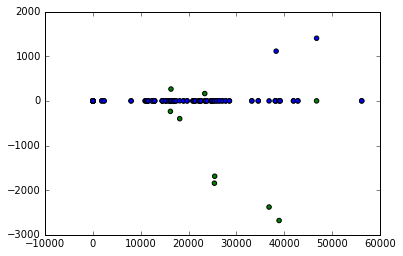

In [299]:
# TOOL 1 to find discrepencies: differences

# Plotting difference between:
# 1) openfisca and online
# 2) m and online

# x = salary (1AJ)
# y_yellow = difference between openfisca and online calculator
# y_blue = difference between m and online calculator

plt.scatter(
    salaire + salaire,
    diff_m + diff_openfisca ,
    c=['green'] * len(diff_m) + ['blue'] * len(diff_openfisca) )

In [300]:
# TOOL 2 to find discrepencies: commun ground

# Computing Probable outliner:
# if two calculators are equal and one is different, the different might be the one buggy

def commun(a, b, c):
    diffa = min(abs(a-b), abs(a-c))
    diffb = min(abs(a-b), abs(b-c))    
    diffc = min(abs(c-b), abs(a-c))

    if diffa <= diffb and diffa <= diffc:
        return a
    if diffb <= diffa and diffb <= diffc:
        return b
    if diffc <= diffa and diffc <= diffb:
        return c
    # We do not handle yet the hypothetic case of a circular reference
    print 'Circular condition, please define behavior here' 
    assert(False)

probable_true_tax = []
for i in range(0, len(impot_m)):
    probable_true_tax.append(commun(impot_m[i], impot_online[i], impot_openfisca[i]))

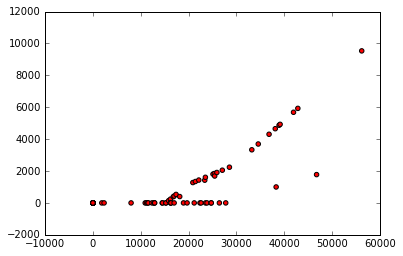

In [301]:
# x = salary
# y = probable_true_tax

plt.scatter(
    salaire,
    probable_true_tax,
    c= ['red'] * len(probable_true_tax))


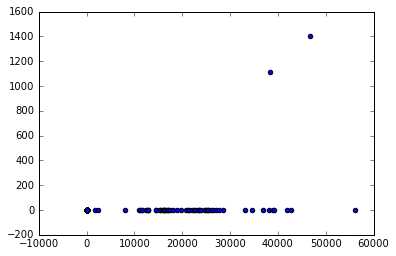

In [302]:
# Errors of openfisca
error_openfisca = [abs(a_i - b_i) for a_i, b_i in zip(impot_openfisca, probable_true_tax)]

plt.scatter(
    salaire,
    error_openfisca)


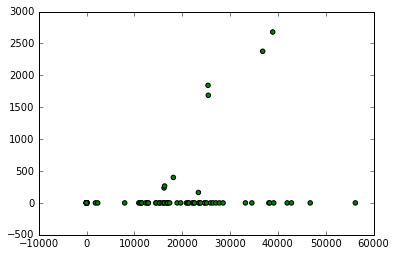

In [303]:
# Errors of m
error_m = [abs(a_i - b_i) for a_i, b_i in zip(impot_m, probable_true_tax)]

plt.scatter(
    salaire,
    error_m,
    c=['green'] * len(impot_m))

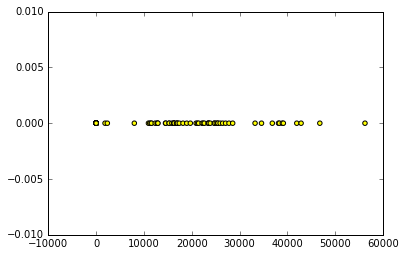

In [304]:
# Errors of online
error_online = [abs(a_i - b_i) for a_i, b_i in zip(impot_online, probable_true_tax)]

plt.scatter(
    salaire,
    error_online,
    c=['yellow'] * len(impot_online))

In [312]:
# TOOL 3 to find discrepencies: showing worst testcases

def show_highest_discrepencies(my_list):
    index_errors = sorted(range(len(my_list)), key=lambda k: my_list[k], reverse=True)
    average_age = 0

    from input_variable_converter import CerfaOpenFiscaConverter
    input_converter = CerfaOpenFiscaConverter()

    for i in range(0, len(salaire)):
        idx = index_errors[i]
        print 'Testcase: ' + repr(comp.testcases[idx])
        print 'Impot m: ' + repr(int(impot_m[idx]))
        print 'Impot openfisca: ' + repr(int(impot_openfisca[idx]))
        print 'Impot online: ' + repr(int(impot_online[idx]))
        average_age += comp.testcases[idx]['0DA']



In [315]:
show_highest_discrepencies(error_openfisca)

Testcase: {u'F': 2, u'1AJ': 46766, u'M': 1, u'0DA': 1972, u'year': 2014}
Impot m: 1776
Impot openfisca: 3179
Impot online: 1776
Testcase: {u'F': 1, u'1AJ': 38309, u'M': 1, u'0DA': 1949, u'year': 2014}
Impot m: 1000
Impot openfisca: 2113
Impot online: 1000
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1943, u'1AJ': 18154}
Impot m: 0
Impot openfisca: 400
Impot online: 399
Testcase: {u'C': 1, u'1AJ': 23387, u'0DA': 1934, u'year': 2014}
Impot m: 1590
Impot openfisca: 1426
Impot online: 1426
Testcase: {u'C': 1, u'1AJ': 56205, u'0DA': 1960, u'year': 2014}
Impot m: 9536
Impot openfisca: 9536
Impot online: 9536
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1950, u'1AJ': 16206}
Impot m: 0
Impot openfisca: 235
Impot online: 235
Testcase: {u'1AJ': 16979, u'D': 1, u'0DA': 1993, u'year': 2014}
Impot m: 431
Impot openfisca: 430
Impot online: 431
Testcase: {u'C': 1, u'1AJ': 20898, u'0DA': 1963, u'year': 2014}
Impot m: 1277
Impot openfisca: 1276
Impot online: 1277
Testcase: {u'C': 1, u'1AJ': 25921, u'0DA': 

In [316]:
show_highest_discrepencies(error_m)

Testcase: {u'V': 1, u'year': 2014, u'0DA': 1953, u'1AJ': 38928}
Impot m: 2192
Impot openfisca: 4871
Impot online: 4872
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1966, u'1AJ': 36831}
Impot m: 1928
Impot openfisca: 4305
Impot online: 4306
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1992, u'1AJ': 25402}
Impot m: 0
Impot openfisca: 1844
Impot online: 1844
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1937, u'1AJ': 25462}
Impot m: 0
Impot openfisca: 1688
Impot online: 1688
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1943, u'1AJ': 18154}
Impot m: 0
Impot openfisca: 400
Impot online: 399
Testcase: {u'1AJ': 16322, u'D': 1, u'0DA': 1945, u'year': 2014}
Impot m: 265
Impot openfisca: 0
Impot online: 0
Testcase: {u'V': 1, u'year': 2014, u'0DA': 1950, u'1AJ': 16206}
Impot m: 0
Impot openfisca: 235
Impot online: 235
Testcase: {u'C': 1, u'1AJ': 23387, u'0DA': 1934, u'year': 2014}
Impot m: 1590
Impot openfisca: 1426
Impot online: 1426
Testcase: {u'1AJ': 0, u'D': 1, u'0DA': 1930, u'year': 2014}
Impot m: 0


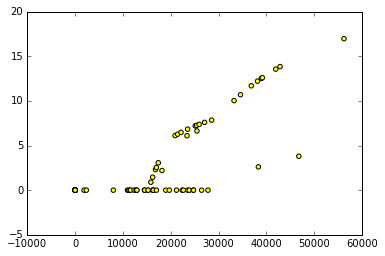

In [306]:
# Marginal tax rate

probable_true_marginal_rate = []
for i in range(0, len(salaire)):
    probable_true_marginal_rate.append(100 * probable_true_tax[i] / (salaire[i]+0.01))
plt.scatter(
    salaire,
    probable_true_marginal_rate,
    c=['yellow'] * len(impot_online))

In [307]:
# TOOL 4 to find discrepencies: weighting input variables by error

# For instance, we could find a bug that people born in 1936 with a salary of 19k have a discrepency in M

combined_total = {}
combined_total_ref = {}
combined_diff = {}
for var in comp.testcases[0]:
    combined_total[var] = 0
    combined_total_ref[var] = 0
combined_weights = 0 

for i in range(0, len(salaire)):
    for var in comp.testcases[i]:
        combined_total[var] = combined_total.get(var, 0) + comp.testcases[i].get(var, 0) * error_openfisca[i]
        combined_total_ref[var] = combined_total_ref.get(var, 0) + comp.testcases[i][var]
    combined_weights += error_openfisca[i]
for var in combined_total:
    combined_total[var] = combined_total[var] / combined_weights
    combined_total_ref[var] = combined_total_ref[var] / len(salaire)
    combined_diff[var] = combined_total[var] - combined_total_ref[var]

print 'Reference average: ' + repr(combined_total_ref)
print 'Weighted by bug average: ' + repr(combined_total)
print 'Difference: ' + repr(combined_diff)


Reference average: {u'C': 0, u'D': 0, u'F': 0, u'V': 0, u'M': 0, u'year': 2014, u'0DA': 1960, u'1AJ': 13066}
Weighted by bug average: {u'C': 0.002034231692265016, u'D': 0.000633149058583293, u'F': 1.5514522017147392, u'V': 0.001226732339737949, u'M': 0.9961058869094137, u'year': 2014.0, u'0DA': 1961.8137903594481, u'1AJ': 42964.154914270046}
Difference: {u'C': 0.002034231692265016, u'D': 0.000633149058583293, u'F': 1.5514522017147392, u'V': 0.001226732339737949, u'M': 0.9961058869094137, u'year': 0.0, u'0DA': 1.8137903594481486, u'1AJ': 29898.154914270046}


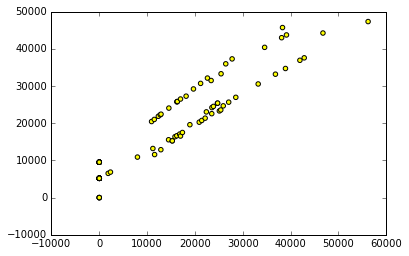

In [308]:
# Disposable income

plt.scatter(
    salaire,
    revdisp,
    c=['yellow'] * len(impot_online))

In [294]:
for i in range(0, len(salaire)):
    if revdisp[i] < 5000.0:
        print revdisp[i]
        print comp.testcases[i]

0.0
{u'C': 1, u'1AJ': 0, u'0DA': 1995, u'year': 2014}
0.0
{u'C': 1, u'1AJ': 0, u'0DA': 1992, u'year': 2014}
0.0
{u'F': 2, u'1AJ': 0, u'M': 1, u'0DA': 1992, u'year': 2014}
0.0
{u'1AJ': 0, u'M': 1, u'0DA': 1991, u'year': 2014}
